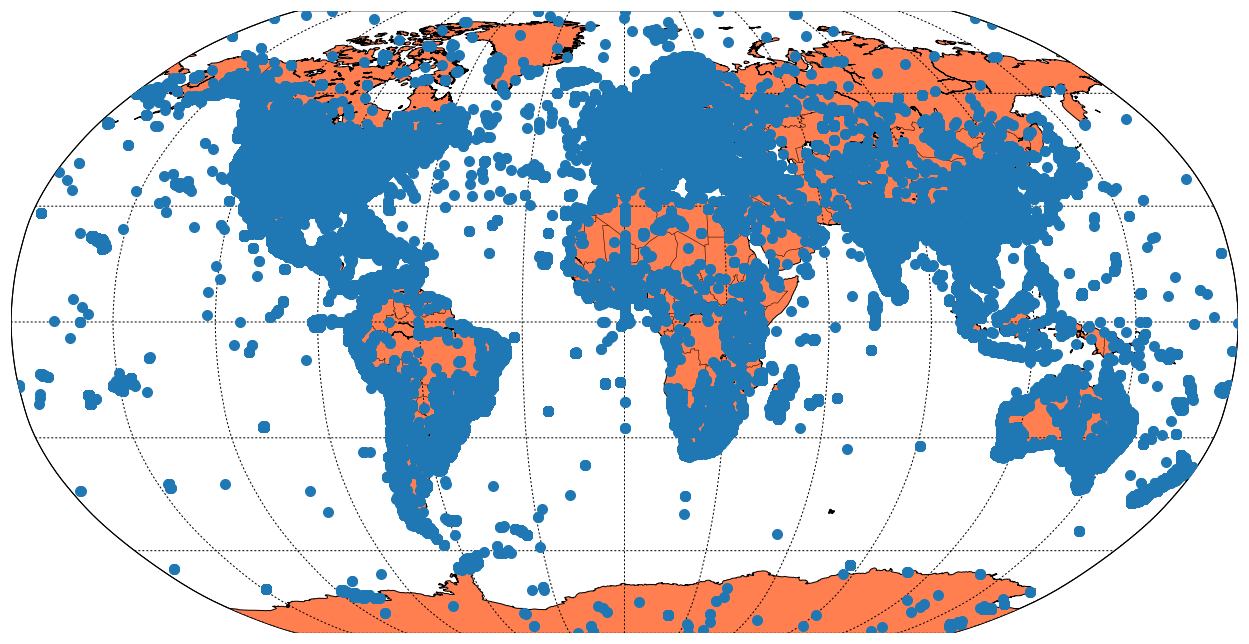

In [52]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("train_cleaned_all.csv");


# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1

plt.figure(figsize=(22,14))


my_map = Basemap(projection='robin', lat_0=0, lon_0=-0,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))


    
lons = (df["longitude"]).tolist()
lats = (df["latitude"]).tolist()

x,y = my_map(lons, lats)
my_map.plot(x, y, 'o', markersize=10)
 
plt.show()

In [51]:
len(df)

7009849

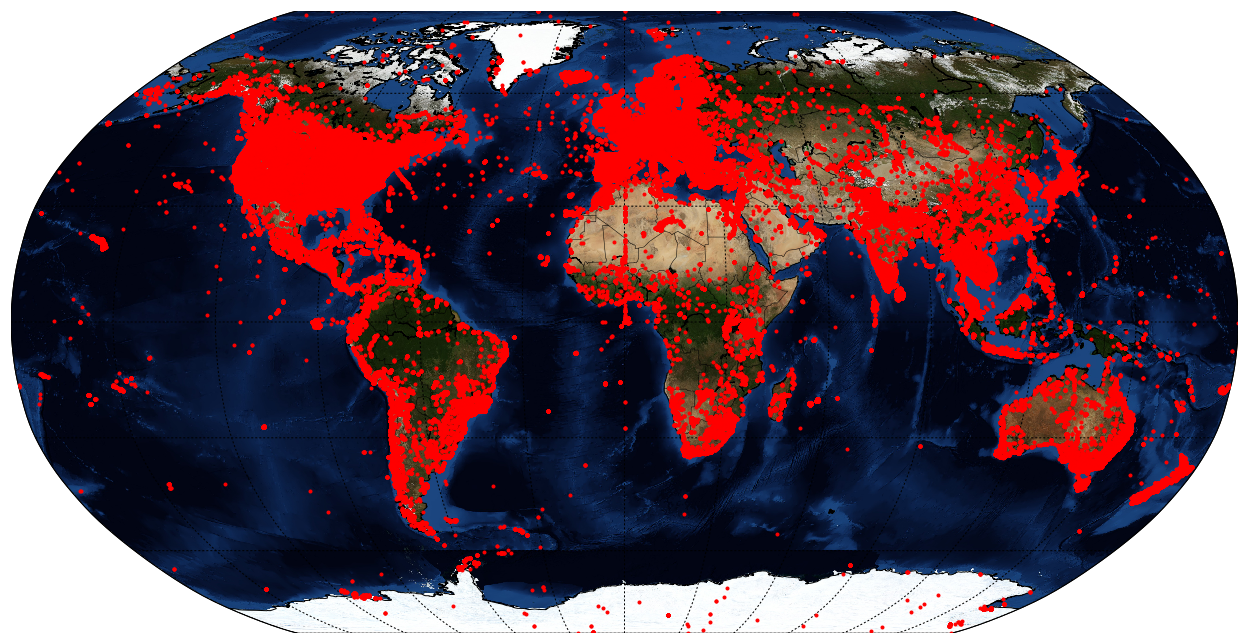

In [59]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("train_cleaned_all.csv");


# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1

plt.figure(figsize=(22,14))


my_map = Basemap(projection='robin', lat_0=0, lon_0=-0,
              resolution='l', area_thresh=1000.0, )
 
my_map.drawcoastlines()
my_map.drawcountries()
#my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.bluemarble()


my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))


    
lons = (df["longitude"]).tolist()
lats = (df["latitude"]).tolist()

x,y = my_map(lons, lats)
my_map.plot(x, y, 'ro', markersize=3)
 
plt.show()



 


In [60]:
#DBSCAN clustering to reduce spatial data set size  #########################################################



In [77]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, kmeans2, whiten

In [78]:
# define the number of kilometers in one radian
df=pd.read_csv("train1.csv");
len(df)

494630

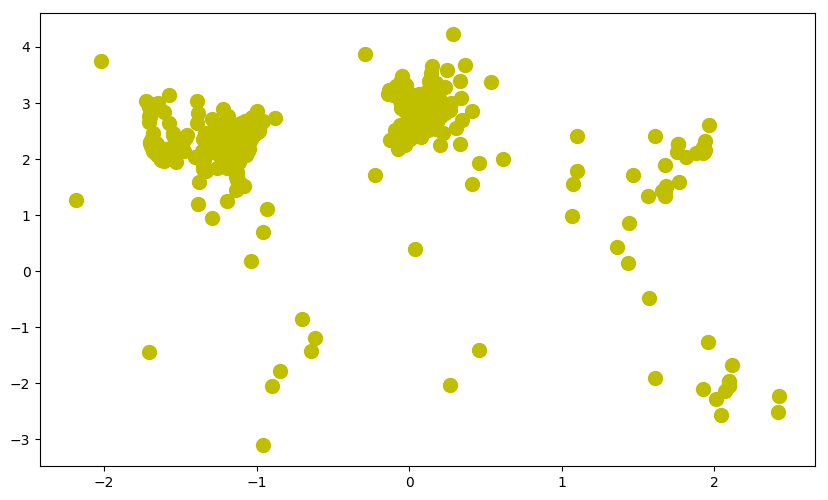

In [83]:
# represent points consistently as (lat, lon)
coordinates = df.as_matrix(columns=['longitude','latitude'])
# N is the number of observations to group into k clusters
N = len(coordinates)

# normalize the coordinate data with the whiten function
# each feature is divided by its standard deviation across all observations to give it unit variance.
w = whiten(coordinates)

# k is the number of clusters to form
k =400

# i is the number of iterations to perform
i = 50


# performs k-means on a set of observation vectors forming k clusters
# returns a k-length array of cluster centroid coordinates, and the final distortion
cluster_centroids1, distortion = kmeans(w, k, iter=i)

# plot the cluster centroids
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(cluster_centroids1[:,0], cluster_centroids1[:,1], c='y', s=100)
plt.show()

In [ ]:

# the kmeans2 function classifies the set of observations into k clusters using the k-means algorithm
# returns a k by N array of centroids found at the last iteration of k-means,
# and an index of the centroid the i'th observation is closest to
# use optional argument minit='points' because the data is not evenly distributed
# minit='points' will choose k observations (rows) at random from data for the initial centroids
cluster_centroids2, closest_centroids = kmeans2(w, k, iter=i, minit='points')

# plot the cluster centroids
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(cluster_centroids2[:,0], cluster_centroids2[:,1], c='r', s=100)
plt.scatter(w[:,0], w[:,1], c='k', alpha=.3, s=10)
plt.show()